## There is no denying that the climate is changing and, with the changing climate natural disasters become worse and cause more damage.  Climate change is directly correlated to environmental security, regional stability, maritime security, humanitarian issues, and overall global security.  Droughts, floods, hurricanes damage infrastructure, interrupt the supply chain, add to food instability, and adding to the deterioration of the natural habitats of thousands of species. This is storm data from NOAA. The first file is data from 2006 and will be used as my baseline for this analysis.  This analysis, spread over the course of five years, is meant to highlight the climate crisis and offer my perspective on consequences, new patterns, and possible solutions.  While I may not be an expert on climate or anything relating to the weather, I do understand the damage that can be caused if climate change is not taken as a serious threat.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('StormEvents_details-database_v1.0_d2020_c20210604.csv')
df.head(1)

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_TITLE,EPISODE_NARRATIVE,EVENT_NARRATIVE,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,LAST_MOD,LAST_CERT,ADDCORR_FLG,ADDCORR_DATE,DATA_SOURCE
0,202006,24,1620,202006,24,1620,149684,902190,GEORGIA,13,2020,June,Thunderstorm Wind,C,321,WORTH,TAE,24-JUN-20 16:20:00,EST-5,24-JUN-20 16:20:00,0,0,0,0,0.00K,0.00K,911 Call Center,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,DOLES,1.0,W,DOLES,31.7,-83.89,31.7,-83.89,GA Severe Storms June 22-25,"As is typical during summer, scattered afterno...",A power line was blown down on Highway 32W. H...,99999999,9999,20200828,2004,NaN,08/28/2020 20:04:53,NaN,NaN,CSV


# The first thing I notice right away is the most common start date is about a month earlier in 2018 than 2006 and the same with the end date.  

In [2]:
df['BEGIN_DATE_TIME'].describe()

count                  60714
unique                 33913
top       01-DEC-20 00:00:00
freq                     442
Name: BEGIN_DATE_TIME, dtype: object

In [3]:
begin_dates = df[df['BEGIN_DATE_TIME'] == '01-DEC-20 00:00:00']

## For the begin dates in 2020, Texas had the most storms.  Texas appeared 20 times within the begin dates during 2019, in 2020 it appear 100 times.  Drought was the most common storm, occuring over 300 times.  It may not be all different storms.  It is likely there is overlap on multiple occerences.  In 2019 most of the states with a majority of the data were farther north. 

##  The end dates follow the same pattern as the begin dates.  Drought still appears the most. The most common end date is a day earlier than the most common begin date. 

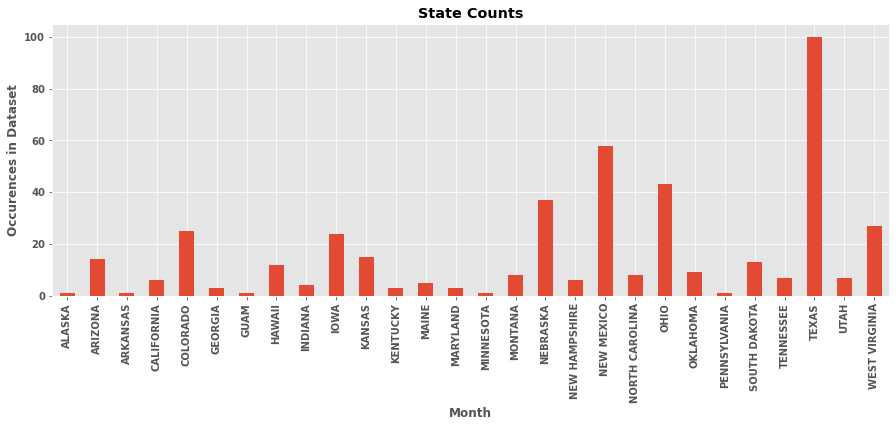

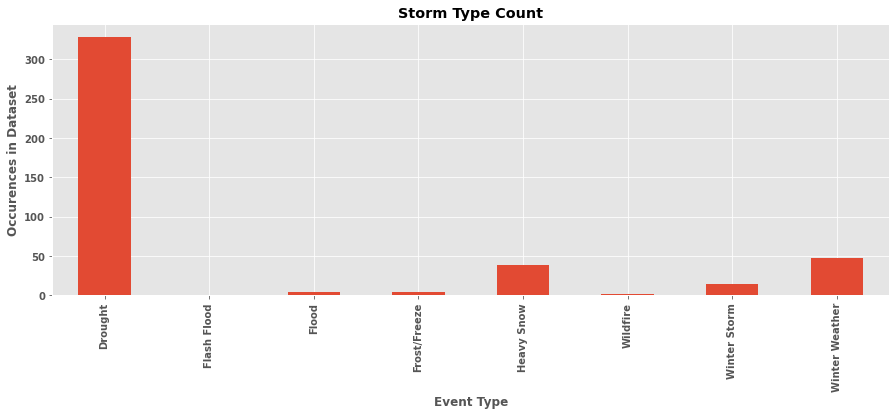

In [4]:
plt.figure(figsize=(15,5))
begin_dates.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
begin_dates.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [5]:
df['END_DATE_TIME'].describe()

count                  60714
unique                 33068
top       30-NOV-20 23:59:00
freq                     437
Name: END_DATE_TIME, dtype: object

In [6]:
end_dates = df[df['END_DATE_TIME'] == '30-NOV-20 23:59:00']

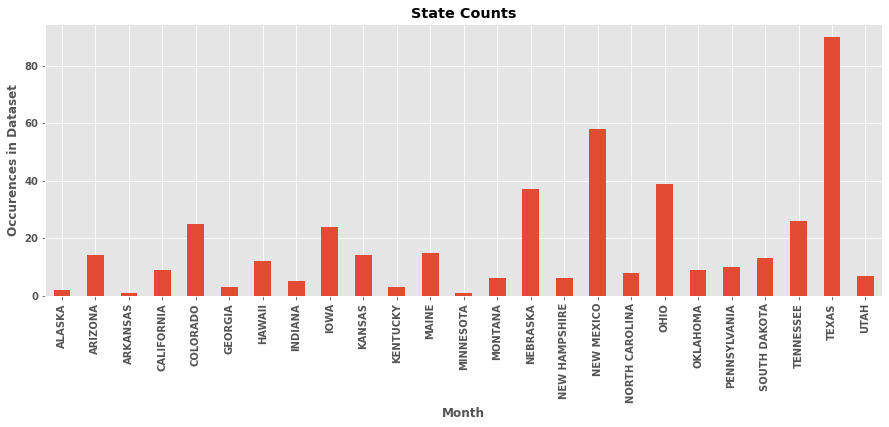

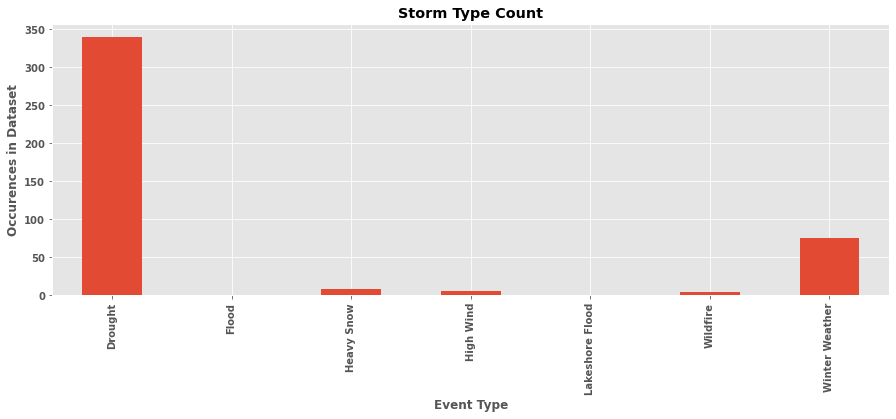

In [7]:
plt.figure(figsize=(15,5))
end_dates.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
end_dates.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [8]:
df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,60714.000000,60714.000000,60714.000000,60714.000000,60714.000000,60714.000000,60714.000000,60714.000000,60714.000000,60714.0,60714.000000,60714.000000,60714.000000,60714.000000,60714.000000,34833.000000,63.000000,1244.000000,1244.000000,169.000000,39744.000000,39744.000000,39744.000000,39744.000000,39744.000000,39744.000000,6.071400e+04,60714.000000,6.071400e+04,60714.000000,10727.000000,1.072700e+04
mean,202006.278140,14.547452,1270.456419,202006.278140,15.869042,1433.144135,149347.811263,900165.991336,33.970056,2020.0,113.681754,0.022005,0.006127,0.007313,0.002322,40.554439,1.666667,3.407556,209.303055,94.289941,2.302813,2.308072,37.790442,-88.513239,37.789533,-88.507337,4.725724e+07,4287.815825,2.020241e+07,1309.527242,1.125944,2.020607e+07
std,3.026715,8.749888,670.245858,3.026715,8.862829,616.837577,2994.342661,18922.659472,20.040777,0.0,145.845490,1.070710,0.445426,0.150696,0.079184,22.156254,0.842424,4.286635,328.605034,81.241659,4.095797,4.058439,5.275451,11.240325,5.276672,11.238554,3.777571e+07,4112.361310,3.548183e+03,386.656023,0.331802,4.642712e+03
min,202001.000000,1.000000,0.000000,202001.000000,1.000000,0.000000,143808.000000,863438.000000,1.000000,2020.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.130000,1.000000,0.010000,1.000000,1.000000,0.000000,0.000000,-14.347700,-170.821200,-14.347600,-170.821100,2.020010e+07,0.000000,2.020020e+07,7.000000,1.000000,2.020052e+07
25%,202004.000000,7.000000,800.000000,202004.000000,8.000000,1004.250000,146816.000000,883990.250000,19.000000,2020.0,27.000000,0.000000,0.000000,0.000000,0.000000,35.000000,1.000000,0.567500,50.000000,33.000000,1.000000,1.000000,34.451075,-95.940000,34.458600,-95.940000,2.020072e+07,1216.000000,2.020063e+07,1038.000000,1.000000,2.020092e+07
50%,202006.000000,13.000000,1428.000000,202006.000000,15.000000,1549.000000,149100.000000,900084.500000,33.000000,2020.0,67.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000,1.950000,100.000000,77.000000,1.000000,1.000000,38.380000,-87.330600,38.377900,-87.327900,2.020103e+07,1727.000000,2.020092e+07,1313.000000,1.000000,2.021012e+07
75%,202008.000000,22.000000,1800.000000,202008.000000,24.000000,1900.000000,151892.750000,916190.750000,46.000000,2020.0,129.000000,0.000000,0.000000,0.000000,0.000000,53.000000,2.000000,4.492500,250.000000,127.000000,3.000000,3.000000,41.383850,-80.270000,41.383175,-80.266375,1.000000e+08,9999.000000,2.020113e+07,1548.000000,1.000000,2.021022e+07
max,202012.000000,31.000000,2359.000000,202012.000000,31.000000,2359.000000,156697.000000,946983.000000,99.000000,2020.0,873.000000,170.000000,100.000000,19.000000,12.000000,126.000000,4.000000,28.510000,3960.000000,441.000000,149.000000,149.000000,64.070000,144.932100,64.021100,144.794300,1.000000e+08,9999.000000,2.021051e+07,2350.000000,2.000000,2.021052e+07


In [9]:
begin_dates.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,442.0,442.0,442.0,442.0,442.000000,442.000000,442.000000,442.000000,442.000000,442.0,442.000000,442.0,442.0,442.0,442.0,0.0,0.0,0.0,0.0,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,4.420000e+02,442.000000,4.420000e+02,442.000000,34.000000,3.400000e+01
mean,202012.0,1.0,0.0,202012.0,22.832579,1939.687783,154370.323529,930891.832579,34.477376,2020.0,125.319005,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,41.456840,-76.231680,41.449680,-76.22866,5.884128e+07,5498.979638,2.021025e+07,1405.393665,1.088235,2.021051e+07
std,0.0,0.0,0.0,0.0,12.994121,749.607929,547.762471,3765.525611,14.571294,0.0,143.944450,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.707107,0.707107,4.226154,8.754655,4.221747,8.75664,3.992024e+07,4376.585992,6.731253e+01,355.491412,0.287902,6.474962e+00
min,202012.0,1.0,0.0,202012.0,1.000000,0.000000,153310.000000,923015.000000,2.000000,2020.0,1.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,35.271900,-91.241000,35.268100,-91.24060,2.020120e+07,16.000000,2.021012e+07,803.000000,1.000000,2.021050e+07
25%,202012.0,1.0,0.0,202012.0,2.000000,1650.000000,153962.000000,927993.250000,23.000000,2020.0,22.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,38.813000,-76.751400,38.814600,-76.75180,2.021022e+07,1159.000000,2.021022e+07,1219.000000,1.000000,2.021050e+07
50%,202012.0,1.0,0.0,202012.0,31.000000,2359.000000,154146.000000,930364.500000,35.000000,2020.0,62.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,44.041600,-71.693000,44.018700,-71.68560,2.021023e+07,2201.000000,2.021023e+07,1318.000000,1.000000,2.021052e+07
75%,202012.0,1.0,0.0,202012.0,31.000000,2359.000000,155005.000000,934682.500000,48.000000,2020.0,204.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,44.471000,-70.864000,44.471900,-70.85780,1.000000e+08,9999.000000,2.021023e+07,1623.750000,1.000000,2.021052e+07
max,202012.0,1.0,0.0,202012.0,31.000000,2359.000000,155127.000000,946806.000000,98.000000,2020.0,526.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,44.686700,-70.609000,44.675100,-70.60750,1.000000e+08,9999.000000,2.021050e+07,2216.000000,2.000000,2.021052e+07


In [10]:
end_dates.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,437.0,437.000000,437.000000,437.0,437.0,437.0,437.000000,437.000000,437.000000,437.0,437.000000,437.0,437.0,437.0,437.0,6.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0000,1.0000,1.0000,1.000,4.370000e+02,437.000000,4.370000e+02,437.000000,18.0,18.0
mean,202011.0,8.368421,300.691076,202011.0,30.0,2359.0,153933.395881,927394.199085,33.029748,2020.0,113.546911,0.0,0.0,0.0,0.0,51.666667,NaN,NaN,NaN,NaN,1.0,1.0,35.2749,-91.2416,35.2609,-91.246,5.946548e+07,5646.423341,2.020954e+07,1544.363844,1.0,20210505.0
std,0.0,11.970308,596.719997,0.0,0.0,0.0,456.062205,2723.949835,13.918885,0.0,129.737458,0.0,0.0,0.0,0.0,2.581989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.993606e+07,4297.082886,2.218467e+03,375.256943,0.0,0.0
min,202011.0,1.000000,0.000000,202011.0,30.0,2359.0,152995.000000,923045.000000,2.000000,2020.0,1.000000,0.0,0.0,0.0,0.0,50.000000,NaN,NaN,NaN,NaN,1.0,1.0,35.2749,-91.2416,35.2609,-91.246,2.020120e+07,650.000000,2.020123e+07,925.000000,1.0,20210505.0
25%,202011.0,1.000000,0.000000,202011.0,30.0,2359.0,153402.000000,924305.000000,21.000000,2020.0,23.000000,0.0,0.0,0.0,0.0,50.000000,NaN,NaN,NaN,NaN,1.0,1.0,35.2749,-91.2416,35.2609,-91.246,2.021013e+07,1421.000000,2.021012e+07,1301.000000,1.0,20210505.0
50%,202011.0,1.000000,0.000000,202011.0,30.0,2359.0,154030.000000,928116.000000,35.000000,2020.0,60.000000,0.0,0.0,0.0,0.0,50.000000,NaN,NaN,NaN,NaN,1.0,1.0,35.2749,-91.2416,35.2609,-91.246,2.021023e+07,2335.000000,2.021013e+07,1542.000000,1.0,20210505.0
75%,202011.0,17.000000,0.000000,202011.0,30.0,2359.0,154298.000000,929658.000000,47.000000,2020.0,190.000000,0.0,0.0,0.0,0.0,53.750000,NaN,NaN,NaN,NaN,1.0,1.0,35.2749,-91.2416,35.2609,-91.246,1.000000e+08,9999.000000,2.021013e+07,1759.000000,1.0,20210505.0
max,202011.0,30.000000,2300.000000,202011.0,30.0,2359.0,154564.000000,931261.000000,49.000000,2020.0,515.000000,0.0,0.0,0.0,0.0,55.000000,NaN,NaN,NaN,NaN,1.0,1.0,35.2749,-91.2416,35.2609,-91.246,1.000000e+08,9999.000000,2.021023e+07,2350.000000,1.0,20210505.0


## Analysis of whole dataframe

## The state count throughout the whole dataset follows a similar trend as 2019 with some states being lower and others being higher.  There seem to be less states with direct deaths but some of the states had a higher number of deaths in 2020 than in 2019.

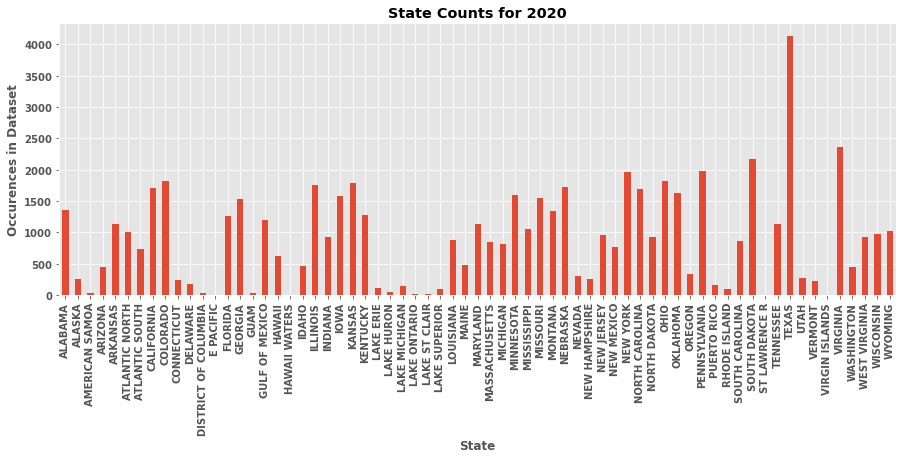

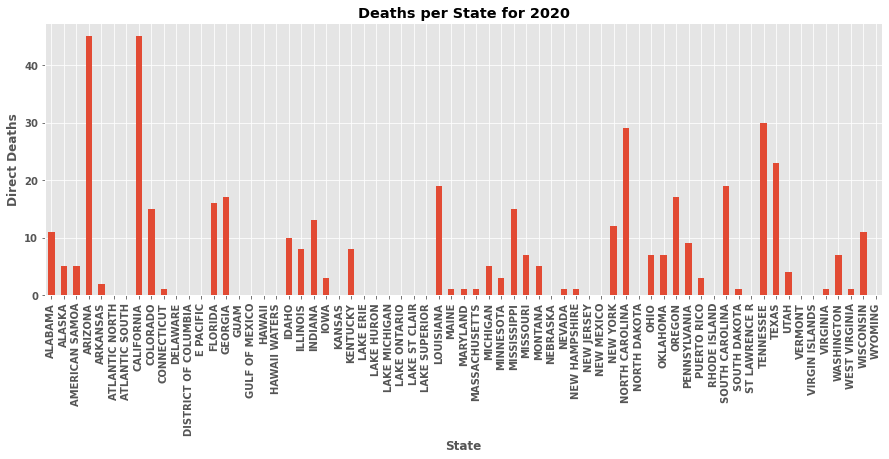

In [11]:
plt.figure(figsize=(15,5))
df.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts for 2020', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('STATE')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per State for 2020', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## The distribution of storms per months follows the same general pattern in 2020 as in 2019.  April and August had more storms than 2019.  Based on the height of these bars in the charts, it looks like September had a higher number of deaths than storms which tells me that storms in September were more intense.

In [52]:
Sep = df[df['MONTH_NAME'] == 'September']

In [53]:
Sep = Sep[['MAGNITUDE', 'EVENT_TYPE', 'DEATHS_DIRECT', 'STATE']]

In [54]:
len(Sep)

2705

In [55]:
Sep['DEATHS_DIRECT'].sum()

65

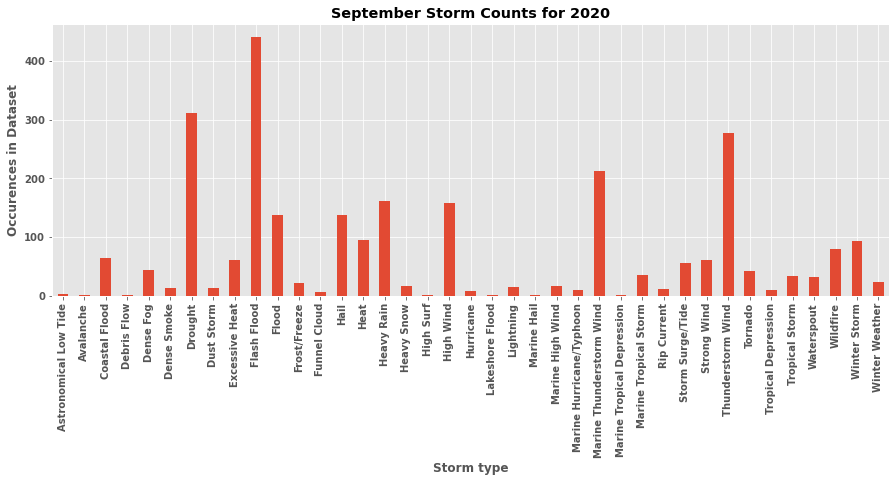

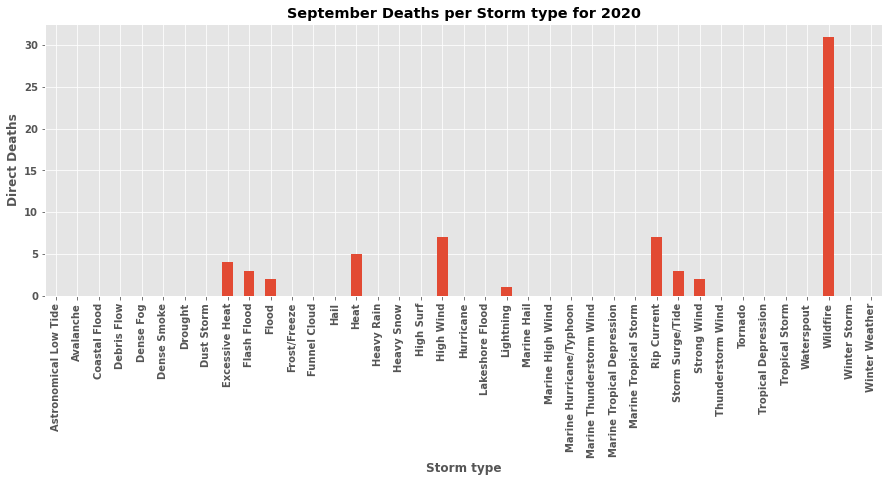

In [56]:
plt.figure(figsize=(15,5))
Sep.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('September Storm Counts for 2020', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Storm type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
Sep.groupby('EVENT_TYPE')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('September Deaths per Storm type for 2020', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Storm type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [57]:
Wildfire = Sep[Sep['EVENT_TYPE'] == 'Wildfire']

In [58]:
len(Wildfire)

80

In [59]:
Wildfire['DEATHS_DIRECT'].sum()

31

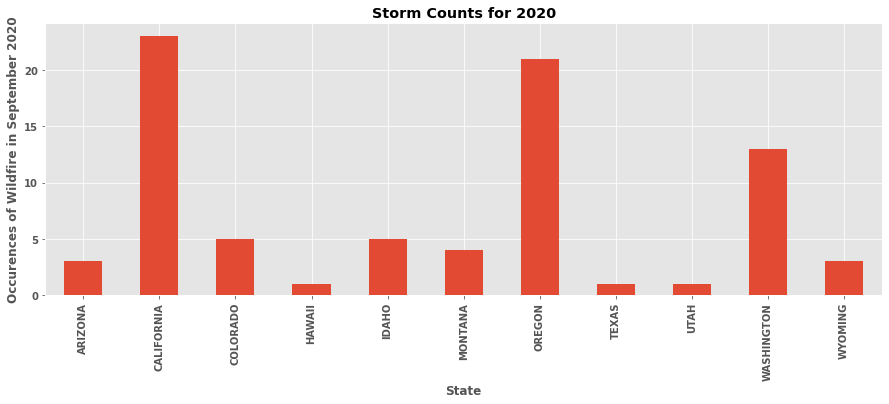

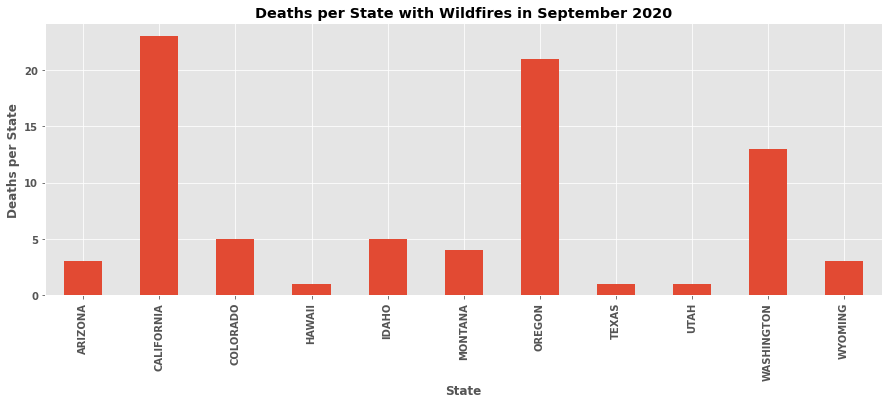

In [62]:
plt.figure(figsize=(15,5))
Wildfire.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('Storm Counts for 2020', fontweight='bold')
plt.ylabel('Occurences of Wildfire in September 2020', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
Wildfire.groupby('STATE')['DEATHS_DIRECT'].count().plot(kind='bar')
plt.title('Deaths per State with Wildfires in September 2020', fontweight='bold')
plt.ylabel('Deaths per State', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [64]:
Wildfire['MAGNITUDE'].sum()

0.0

In [17]:
Sep['MAGNITUDE'].describe()

count    863.000000
mean      40.364948
std       19.336747
min        0.750000
25%       35.000000
50%       47.000000
75%       52.000000
max       91.000000
Name: MAGNITUDE, dtype: float64

<AxesSubplot:xlabel='MAGNITUDE'>

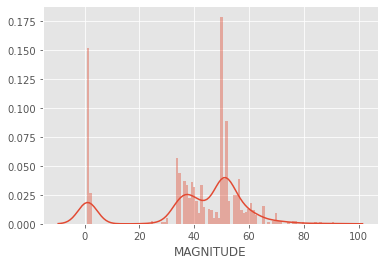

In [18]:
sns.distplot(Sep['MAGNITUDE'], bins=100)

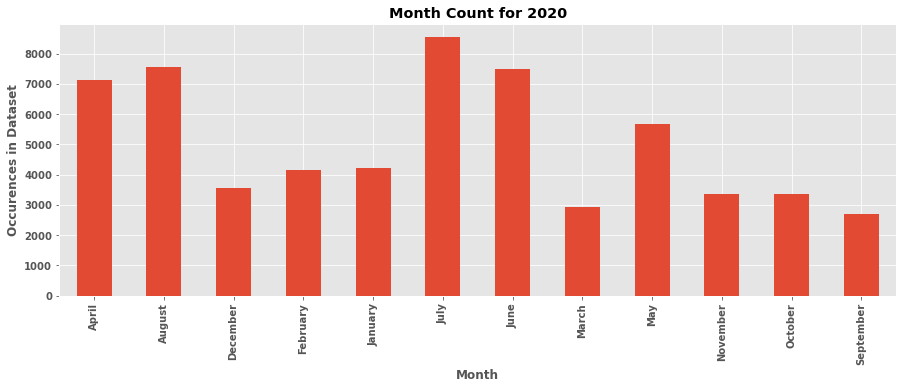

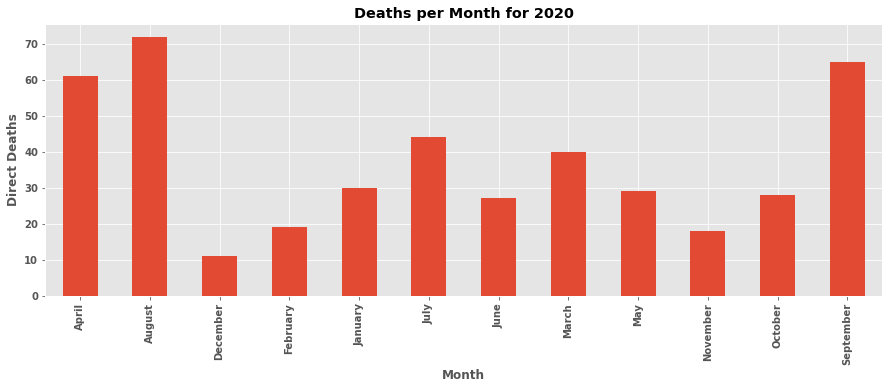

In [19]:
plt.figure(figsize=(15,5))
df.groupby('MONTH_NAME')['MONTH_NAME'].count().plot(kind='bar')
plt.title('Month Count for 2020', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('MONTH_NAME')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per Month for 2020', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## Marine thunderstorm wind and thunderstorm wind both increased, I'm not sure what the difference is other than where it starts, drought also increased.

In [20]:
heat = df[(df['EVENT_TYPE'] == 'Drought') | (df['EVENT_TYPE'] == 'Excessive Heat')]

In [21]:
heat = heat[['EVENT_TYPE']]

In [22]:
heat['EVENT_TYPE'].value_counts()

Drought           2244
Excessive Heat     520
Name: EVENT_TYPE, dtype: int64

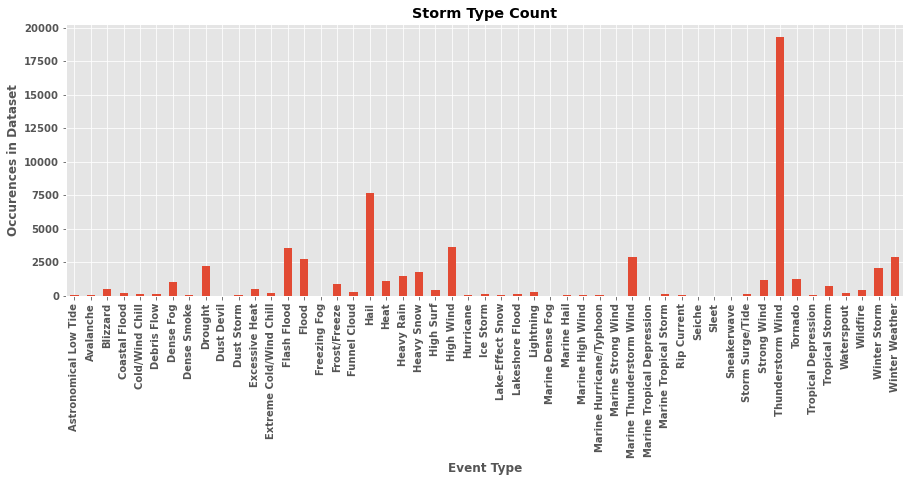

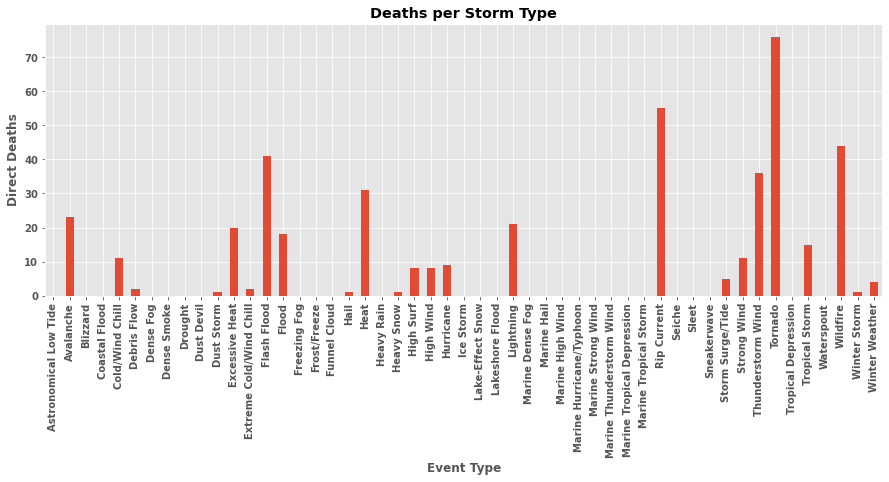

In [23]:
plt.figure(figsize=(15,5))
df.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('EVENT_TYPE')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per Storm Type', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## The range of storms seems to cluster around 10-15 miles and has an extreme of about 160 miles. The cluster is grouped tighter than in 2006 but there are less outliers in 2018 than in 2006.

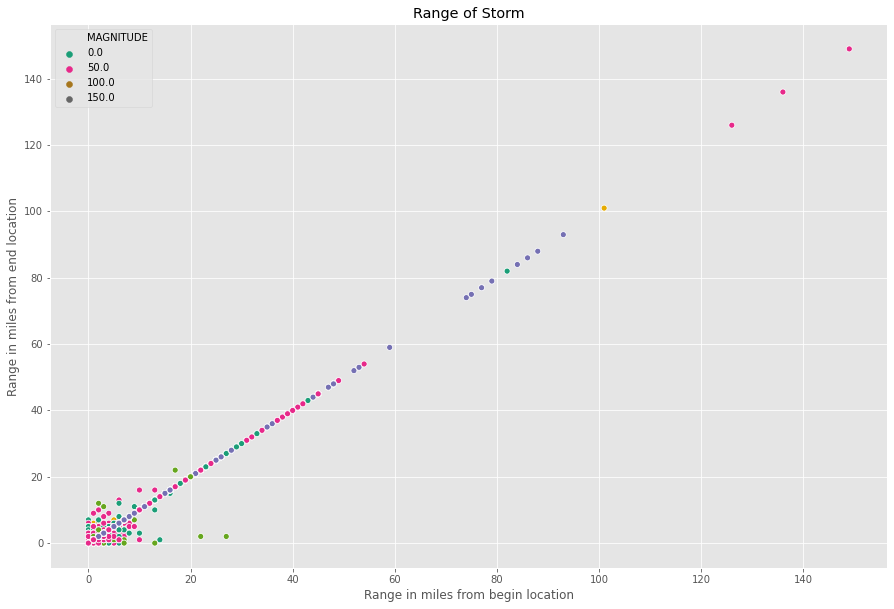

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot('BEGIN_RANGE', 'END_RANGE', hue='MAGNITUDE', data=df, palette='Dark2')
plt.title('Range of Storm')
plt.ylabel('Range in miles from end location')
plt.xlabel('Range in miles from begin location')
plt.show()

# EF0 – Light Damage (40 – 72 mph)
# EF1 – Moderate Damage (73 – 112 mph)
# EF2 – Significant damage (113 – 157 mph)
# EF3 – Severe Damage (158 – 206 mph)
# EF4 – Devastating Damage (207 – 260 mph)
# EF5 – Incredible Damage (261 – 318 mph)

## There's more varition in the size of a tornado in 2018 than 2006 and more tornados seem to have a higher intensity.

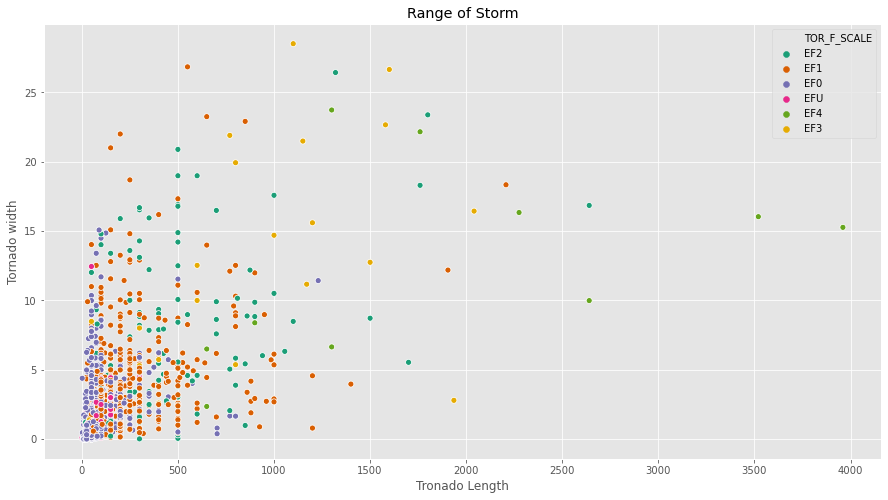

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot('TOR_WIDTH', 'TOR_LENGTH', hue='TOR_F_SCALE', data=df, palette='Dark2')
plt.title('Range of Storm')
plt.ylabel('Tornado width')
plt.xlabel('Tronado Length')
plt.show()

# EG = Wind Estimated Gust; ES = Estimated Sustained Wind; MS = Measured Sustained Wind;
# MG = Measured Wind Gust

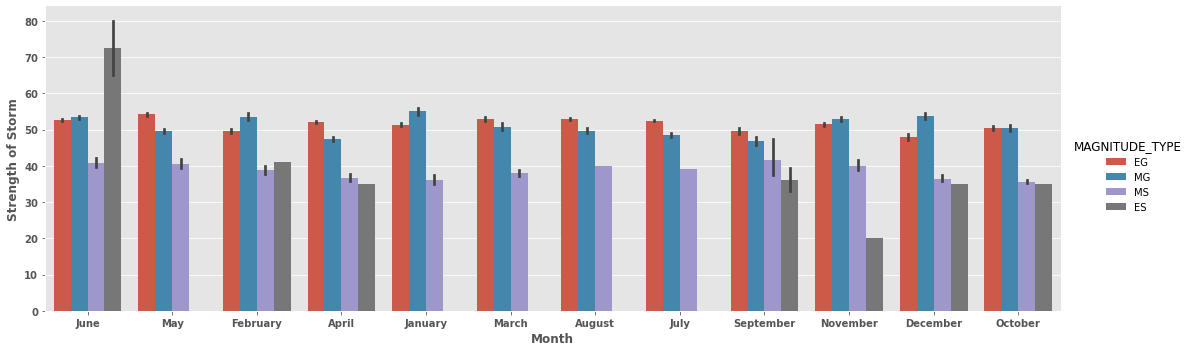

In [26]:
sns.catplot('MONTH_NAME', 'MAGNITUDE', hue='MAGNITUDE_TYPE', data=df,kind='bar', aspect=3)
plt.ylabel('Strength of Storm', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

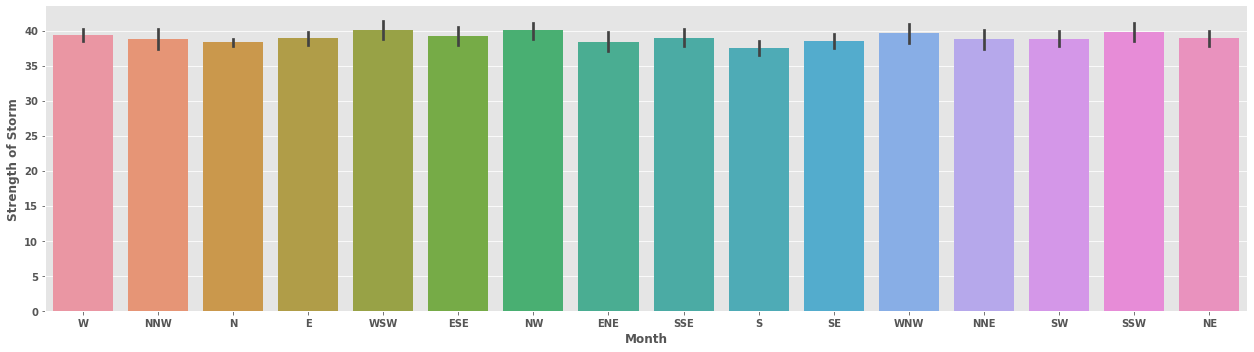

In [27]:
sns.catplot('BEGIN_AZIMUTH', 'MAGNITUDE', data=df,kind='bar', aspect=3.5)
plt.ylabel('Strength of Storm', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

# Date and time analysis

In [28]:
df['BEGIN_DATE_TIME'] = pd.to_datetime(df['BEGIN_DATE_TIME'])
ts = df.set_index(df['BEGIN_DATE_TIME'])
ts['begin_hour'] = ts['BEGIN_DATE_TIME'].dt.hour
early_hours = ts[ts['begin_hour'] < 9]
late_hours = ts[ts['begin_hour'] > 17]

In [29]:
len(ts)

60714

In [30]:
ts['MAGNITUDE'].describe()

count    34833.000000
mean        40.554439
std         22.156254
min          0.130000
25%         35.000000
50%         50.000000
75%         53.000000
max        126.000000
Name: MAGNITUDE, dtype: float64

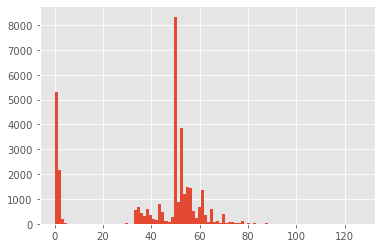

In [31]:
plt.hist(ts['MAGNITUDE'], bins=100)
plt.show()

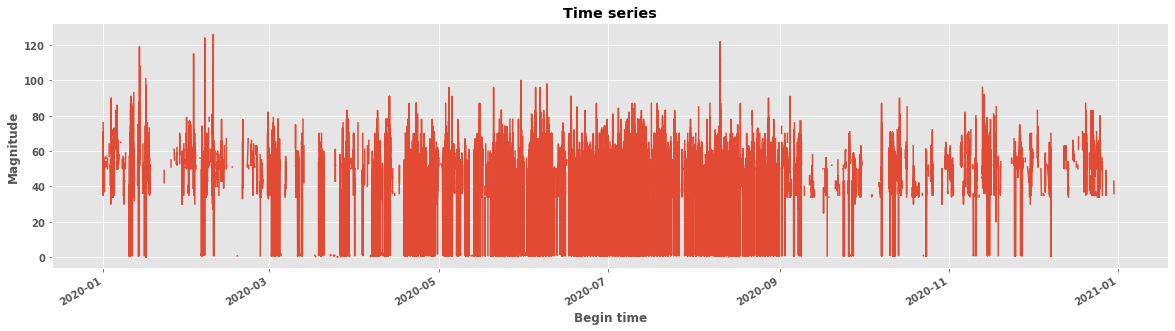

In [32]:
plt.figure(figsize=(20,5))
ts['MAGNITUDE'].plot()
plt.title('Time series', fontweight='bold')
plt.ylabel('Magnitude', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Begin time", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

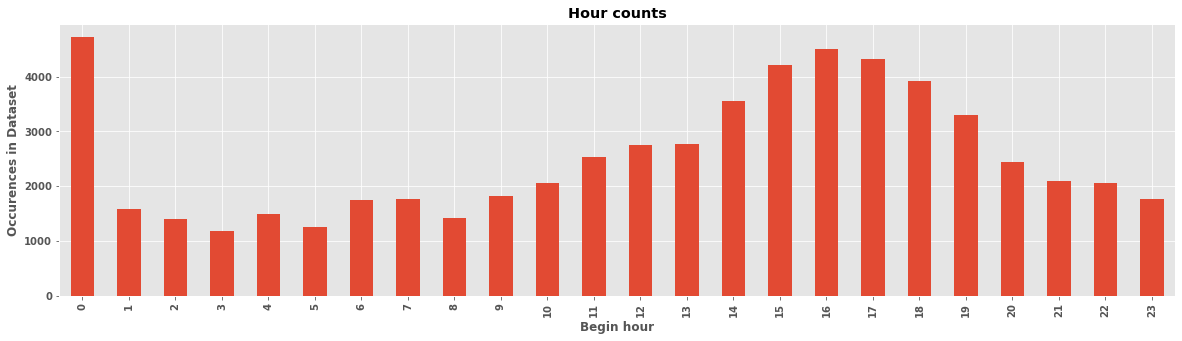

In [33]:
plt.figure(figsize=(20,5))
ts.groupby('begin_hour')['begin_hour'].count().plot(kind='bar')
plt.title('Hour counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Begin hour", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

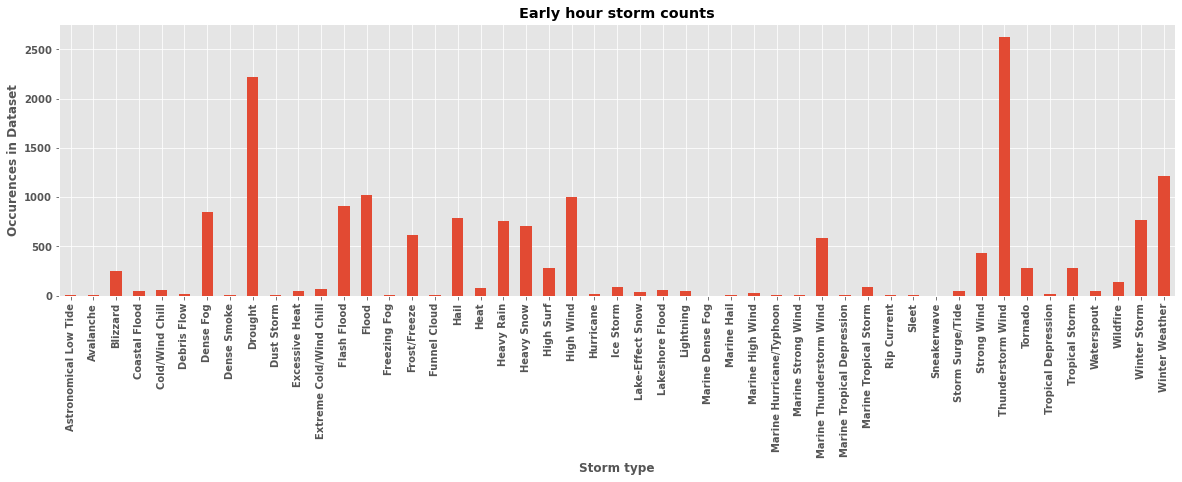

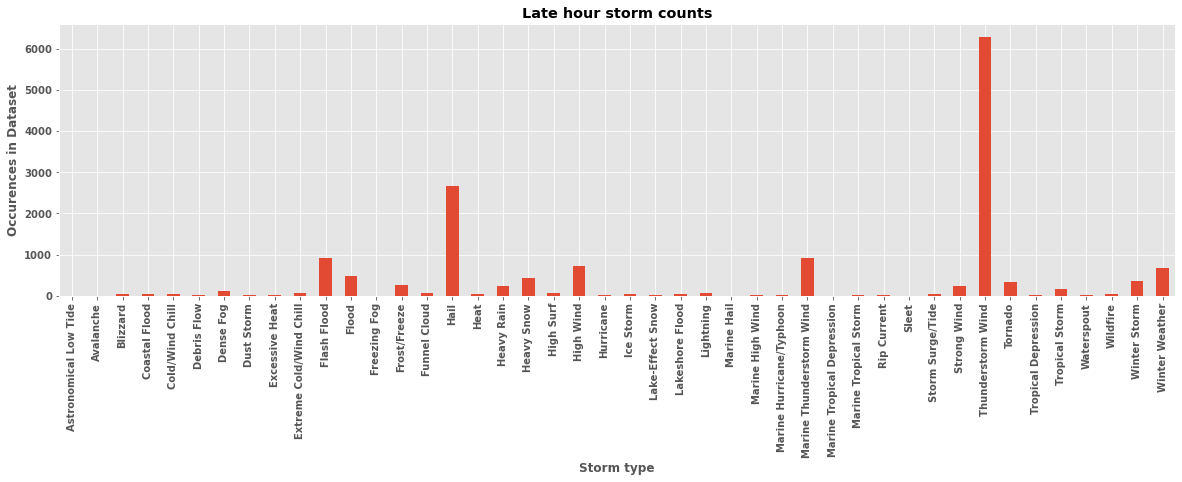

In [34]:
plt.figure(figsize=(20,5))
early_hours.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Early hour storm counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Storm type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(20,5))
late_hours.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Late hour storm counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Storm type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [35]:
df['EVENT_TYPE'].value_counts()

Thunderstorm Wind             19313
Hail                           7668
High Wind                      3665
Flash Flood                    3571
Winter Weather                 2905
Marine Thunderstorm Wind       2887
Flood                          2703
Drought                        2244
Winter Storm                   2093
Heavy Snow                     1783
Heavy Rain                     1450
Tornado                        1244
Strong Wind                    1193
Heat                           1075
Dense Fog                      1002
Frost/Freeze                    878
Tropical Storm                  714
Excessive Heat                  520
Blizzard                        515
High Surf                       415
Wildfire                        397
Funnel Cloud                    264
Lightning                       247
Extreme Cold/Wind Chill         215
Waterspout                      193
Coastal Flood                   187
Ice Storm                       156
Marine Tropical Storm       